# Necessary Libraries

In [294]:
import pandas as pd

# Load Data

In [295]:
# load the train data
train_data = pd.read_csv("train_dataset.csv")

# Explore the data

In [296]:
# see some lines
train_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [297]:
# get the number of data columns and rows
train_data.shape

(614, 13)

In [298]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [299]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [300]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [301]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

this column is ID column: no need for it (no real change on the model prediction):
    
    Loan_ID

## Delete ID column

In [302]:
train_data.drop('Loan_ID', inplace=True, axis=1)

In [303]:
train_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Split the dataset by dataset type (category and numaric)

In [304]:
numerics = ['int64', 'float64']
cetagory = ['object']

train_numaric = train_data.select_dtypes(include=numerics)
train_cetagory = train_data.select_dtypes(include=cetagory)

# Feature Engineering 

## Numaric Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020727077520>,
      dtype=object)

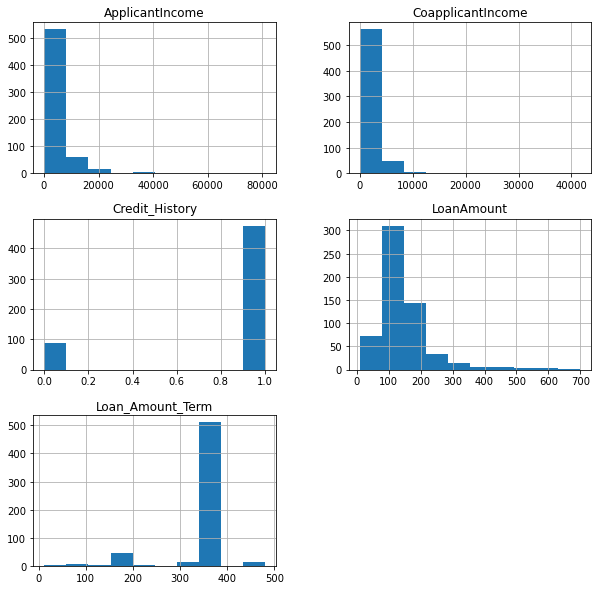

In [305]:
# Display the histogram for the numaric data
train_numaric.hist(figsize=(10,10))

* Credit_History column is a category data but display in numaric form
* noticed that there are no scalling. so we are going to scalling the data

In [306]:
train_numaric = train_numaric.drop('Credit_History', axis=1)
train_cetagory['Credit_History'] = train_data.Credit_History

<ipython-input-306-42dbe1d7e683>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cetagory['Credit_History'] = train_data.Credit_History


### Scaling

In [307]:
for col in train_numaric.columns:
    train_data[col] = (train_numaric[col]-train_numaric[col].mean())/train_numaric[col].std()

train_numaric = (train_numaric-train_numaric.mean())/train_numaric.std()

In [308]:
train_data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207279918B0>,
      dtype=object)

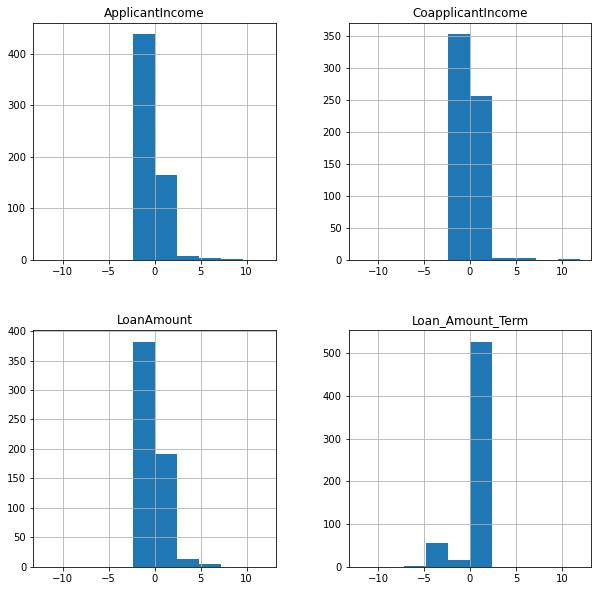

In [309]:
train_numaric.hist(figsize=(10,10),range=[-12, 12])

### Missing values

In [310]:
train_numaric.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
dtype: int64

In [311]:
for col in train_numaric.columns:
    train_data[col] = train_data[col].fillna(train_data[col].mean())

In [312]:
train_data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Category Data

### Missing values 

In [313]:
train_cetagory.isna().sum() 

Gender            13
Married            3
Dependents        15
Education          0
Self_Employed     32
Property_Area      0
Loan_Status        0
Credit_History    50
dtype: int64

this columns has nan values -> need to handle them by replacing the Nan with the frequency value:

    Gender, Dependents, Self_Employed: frequency value

    Married: Last/Next value

#### Handle Married Column

In [314]:
married_missing = train_cetagory["Married"][train_cetagory["Married"].isna()] 
for i in married_missing.keys():
    train_cetagory["Married"].iloc[i] = train_cetagory["Married"].iloc[i-1]

c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-314-2ba58a7a124f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cetagory["Married"].iloc[i] = train_cetagory["Married"].iloc[i-1]


#### Handle other columns missing value

In [315]:
for i in train_cetagory.columns:
    frequency = train_cetagory[i].mode()[0]
    train_cetagory[i].fillna(frequency, inplace=True)

c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [316]:
train_cetagory.isna().sum()

Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Property_Area     0
Loan_Status       0
Credit_History    0
dtype: int64

#### Save the changes to train_data set

In [317]:
for cat in train_cetagory:
    train_data[cat] = train_cetagory[cat]

In [318]:
train_data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Handle Category data to Numaric

In [319]:
train_cetagory.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Credit_History
0,Male,No,0,Graduate,No,Urban,Y,1.0
1,Male,Yes,1,Graduate,No,Rural,N,1.0
2,Male,Yes,0,Graduate,Yes,Urban,Y,1.0
3,Male,Yes,0,Not Graduate,No,Urban,Y,1.0
4,Male,No,0,Graduate,No,Urban,Y,1.0


In [320]:
for col in train_cetagory.columns:
    print(train_cetagory[col].unique())

['Male' 'Female']
['No' 'Yes']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']
['Y' 'N']
[1. 0.]


In [321]:
# perform one-hot encoding on columns
one_hot =  pd.get_dummies(train_cetagory, columns = train_cetagory.columns)
    
# merge one-hot encoded columns with original DataFrame
train_data = train_data.join(one_hot)
    
# Drop the Original Categorical Variable
train_data = train_data.drop(train_cetagory.columns, axis=1)

In [324]:
train_data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_N',
       'Loan_Status_Y', 'Credit_History_0.0', 'Credit_History_1.0'],
      dtype='object')

In [322]:
train_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Credit_History_0.0,Credit_History_1.0
0,0.072931,-0.554036,9.845728e-19,0.276411,0,1,1,0,1,0,...,0,1,0,0,0,1,0,1,0,1
1,-0.134302,-0.038700,-2.151272e-01,0.276411,0,1,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1
2,-0.393427,-0.554036,-9.395335e-01,0.276411,0,1,0,1,1,0,...,0,0,1,0,0,1,0,1,0,1
3,-0.461686,0.251774,-3.085990e-01,0.276411,0,1,0,1,1,0,...,1,1,0,0,0,1,0,1,0,1
4,0.097649,-0.554036,-6.323556e-02,0.276411,0,1,1,0,1,0,...,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.409796,-0.554036,-8.811137e-01,0.276411,1,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
610,-0.212383,-0.554036,-1.243317e+00,-2.487699,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,1
611,0.436818,-0.472019,1.245369e+00,0.276411,0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,1
612,0.356773,-0.554036,4.742272e-01,0.276411,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1


In [323]:
train_data.isna().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_N              0
Loan_Status_Y              0
Credit_History_0.0         0
Credit_History_1.0         0
dtype: int64

# Finally, the Data is ready to play hahahaha